In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

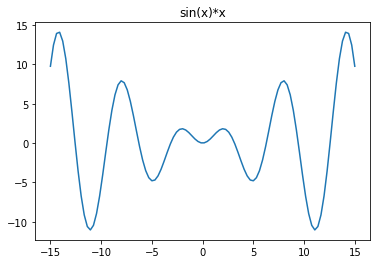

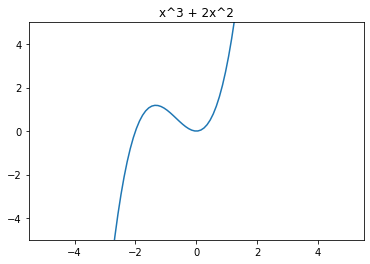

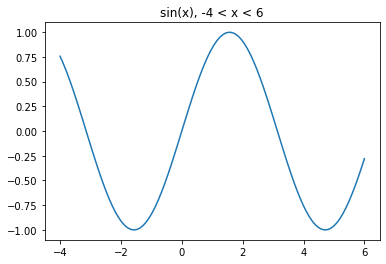

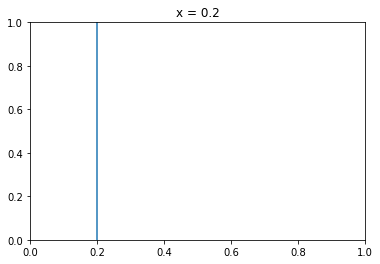

In [55]:
# plot the function f1
x1 = np.linspace(-15,15,100)
y1 = np.sin(x1)*x1
chart1 = pylab.plot(x1,y1)
pylab.title('sin(x)*x')
pylab.show(chart1)

# plot the function f2
x2 = np.linspace(-5,5,100)
y2 = (x2)**3 + 2*(x2)**2
chart2 = pylab.plot(x2,y2)
pylab.ylim(-5, 5, 1)
pylab.title('x^3 + 2x^2')
pylab.show(chart2)

# plot the function f3
x3 = np.linspace(-4,6,100)
y3 = np.sin(x3)
chart3 = pylab.plot(x3,y3)
pylab.title('sin(x), -4 < x < 6')
pylab.show(chart3)

# plot the function f4
chart4 = pylab.axvline(0.2, 0, 1)
pylab.title('x = 0.2')
pylab.show(chart4)

### Задание 2

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$

#### Ответ

Первая производная:

$f'(x) = 2sin(2x+1)(sin(2x+1))'$

$f'(x) = 2sin(2x+1)cos(2x+1)$

$f'(x) = 2sin(4x+2)$

Вторая производная:

$f''(x) = 2(sin(4x+2))'$

$f''(x) = 8cos(4x+2)$

### Задание 3: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

#### Ответ

$f'_x=4xy^3-1/x^2+y^2$

$f'_y=6x^2y^2+2xy$

$f'_x(1,2)=4*8-1+4=35$

$f'_y(1,2)=6*4+4=28$

$grad_f(1,2) = (35, 28)$

In [71]:
def func(x):
    "Coordinate vector `x` should be an array of size two."
    return 2*(x[0]**2)*(x[1]**3) + 1/x[0] + x[0]*(x[1]**2) + 7

x = np.array([1, 2])
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps])

array([35.00000024, 28.00000024])

### Задание 4:

Градиентный спуск своими руками

In [38]:
def f(x):
    return (x[0]**2) + (x[1]**2)

x = np.array([100, 200])
lr = 0.1

for i in range(100):
    grad = np.gradient(x)
    print(f"grad: {grad}")
    x = x - grad * lr
    print(f"x: {x}")

grad: [100. 100.]
x: [ 90. 190.]
grad: [100. 100.]
x: [ 80. 180.]
grad: [100. 100.]
x: [ 70. 170.]
grad: [100. 100.]
x: [ 60. 160.]
grad: [100. 100.]
x: [ 50. 150.]
grad: [100. 100.]
x: [ 40. 140.]
grad: [100. 100.]
x: [ 30. 130.]
grad: [100. 100.]
x: [ 20. 120.]
grad: [100. 100.]
x: [ 10. 110.]
grad: [100. 100.]
x: [  0. 100.]
grad: [100. 100.]
x: [-10.  90.]
grad: [100. 100.]
x: [-20.  80.]
grad: [100. 100.]
x: [-30.  70.]
grad: [100. 100.]
x: [-40.  60.]
grad: [100. 100.]
x: [-50.  50.]
grad: [100. 100.]
x: [-60.  40.]
grad: [100. 100.]
x: [-70.  30.]
grad: [100. 100.]
x: [-80.  20.]
grad: [100. 100.]
x: [-90.  10.]
grad: [100. 100.]
x: [-100.    0.]
grad: [100. 100.]
x: [-110.  -10.]
grad: [100. 100.]
x: [-120.  -20.]
grad: [100. 100.]
x: [-130.  -30.]
grad: [100. 100.]
x: [-140.  -40.]
grad: [100. 100.]
x: [-150.  -50.]
grad: [100. 100.]
x: [-160.  -60.]
grad: [100. 100.]
x: [-170.  -70.]
grad: [100. 100.]
x: [-180.  -80.]
grad: [100. 100.]
x: [-190.  -90.]
grad: [100. 100.]
x: [-

In [23]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [-900. -800.]
Значение функции в минимуме:  1450000.0


Проверка с помощью встроенной функции numpy: 

In [134]:
grad = minimize(f, x, method='nelder-mead', options={'xtol': 1e-6, 'disp': True})
x = grad.x

print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 72
         Function evaluations: 138
Минимум достигается в:  [2.95771327e-07 6.94893813e-08]
Значение функции в минимуме:  9.23094520377088e-14
